# Terminal velocity of raindrops and splashing

D. Cordier
  - 15 décembre 2023
  - [10.5281/zenodo.10391618](https://zenodo.org/uploads/10391618)
  
**Reference** This software program is a complementary material of the paper by Daniel Cordier, Gérard Liger-Belair, David A. Bonhommeau, Thomas Séon, Thomas Appéré, and Nathalie Carrasco, "Capillary processes in extraterrestrial contexts".

**Requirements** 
  - This notebook required 2 python modules : 
    * `lorenz93.py`
    * `zhao15.py`
  - the employed version of Python 3.9.2
  - the set of python modules environment used for this work is recalled in the file
    `requirements.txt`
  - the whole package has been tested and run on Debian Linux 11 and 12.
  
**Outputs** If everything works properly, le following figures should be generated
  - `DmaxDO_TitanEarthMars.pdf`
  - `DmaxDO_TitanEarthMars_Delon11.pdf`
  - `DmaxDO_TitanEarthMars_Delon11Nef12.pdf`
  - `DmaxDO_TitanEarthMars_Delon11Nef12Zhao15.pdf`
  - `DmaxDO_TitanEarthMars_Synthese.pdf`

**Licence** This program is provided under the GNU GPL https://www.gnu.org/licenses/licenses.fr.html#GPL

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#### Module providing the method proposed by Lorenz (1993)

**Reference**
  - Lorenz, R. D. (1993, September). "*The life, death and afterlife of a raindrop on Titan*". Planet. Space Sci., 41 (9), 647-655. doi: 10.1016/0032-0633(93)90048-7

In [35]:
import lorenz93 as l93

# Parameters

### For the Earth

In [36]:
rho_liq_Earth = 1e3   # Liquid density (kg m^-3)
rho_air_Earth = 1.2   # Air density (kg m^-3)
g_Earth       = 9.81  # Planet gravity (m s^-2)
sigma_Earth   = 70e-3 # Surface tension (N m^-1)
eta_Earth     = 1e-3  # Dynamic viscosity (Pa s)

### For Mars

In [37]:
Mco2 = 44e-3 # Masse molaire du CO2
T    = 273   # Température limite basse pour l'atmosphère marsienne.
Pmin = 0.5E5 # Limite basse pour la pression atmosphérique.
Pmax = 4e5   # Limite haute pour la pression atmosphérique.

Rgas = 8.31

rho_air_min_Mars = Pmin*Mco2/Rgas/T # Air density (kg m^-3)
rho_air_max_Mars = Pmax*Mco2/Rgas/T # Air density (kg m^-3)

rho_air_min_Mars, rho_air_max_Mars

rho_liq_Mars = 1e3   # Liquid density (kg m^-3)
g_Mars       = 3.72  # Planet gravity (m s^-2)
sigma_Mars   = 7e-2  # Surface tension (N m^-1)
eta_Mars     = 1e-3  # Dynamic viscosity (Pa s)

### For Titan

In [38]:
rho_liq_Titan = 500   # Liquid density (kg m^-3)
rho_air_Titan = 5.3   # Air density (kg m^-3)
g_Titan       = 1.35  # Planet gravity (m s^-2)
sigma_Titan   = 2e-2  # Surface tension (N m^-1)
eta_Titan     = 2e-4  # Dynamic viscosity (Pa s)

# Max. velocity on the Earth

In [39]:
dmax = 6e-3

rho_liq    = rho_liq_Earth
sigma_liq  = sigma_Earth
rho_air    = rho_air_Earth
Mair       = 28e-3
T          = 273
dim_molecule= 155e-12 # Taille d'une molécule de diazote.
d0         = dmax   # Diamètre de la goutte non-déformée.
g          = g_Earth
V0         = 2.5      # Première estimation de la vitesse de chute de la goutte.

Remax_Earth, Vmax_Earth = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,'LOR',Mair,T,dim_molecule,d0,g,V0,rigid=0,CdEq=10)

print (f" > Terminal velocity of the biggest Earth raindrop: {Vmax_Earth:6.4f} m/s")

 > Terminal velocity of the biggest Earth raindrop: 8.8971 m/s


# Max. velocity on Titan

In [40]:
rho_liq_Titan = 500   # Liquid density (kg m^-3)
rho_air_Titan = 5.3   # Air density (kg m^-3)
g_Titan       = 1.35  # Planet gravity (m s^-2)
sigma_Titan   = 2e-2  # Surface tension (N m^-1)
eta_Titan     = 2e-4  # Dynamic viscosity (Pa s)


dmax = 13e-3

rho_liq    = rho_liq_Titan
sigma_liq  = sigma_Titan
rho_air    = rho_air_Titan
Mair       = 28e-3
T          = 95
dim_molecule= 155e-12 # Taille d'une molécule de diazote.
d0         = dmax   # Diamètre de la goutte non-déformée.
g          = g_Titan
V0         = 2.5      # Première estimation de la vitesse de chute de la goutte.

# WARNING: here the evaluation of the viscosity of the air may be done with the option 'LOR' 
#          (law used by Lorenz, 1993) or with the option 'GP' using ideal gases law.
Remax_Titan, Vmax_Titan = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,'GP',Mair,T,dim_molecule,d0,g,V0,rigid=0,CdEq=10)

print (f" > Terminal velocity of the biggest Earth raindrop: {Vmax_Titan:6.4f} m/s")

 > Terminal velocity of the biggest Earth raindrop: 1.5794 m/s


# Max. velocity on Mars

#### Max. diameter for marsian raindrops

In [41]:
dmax_Mars = np.sqrt(6*sigma_Mars/rho_liq_Mars/g_Mars)
print (f" > Max diameter for marsian raindrops: {dmax_Mars*1e3:4.2f} mm")

 > Max diameter for marsian raindrops: 10.63 mm


#### Atmospheric pressure of $P_{min} = 0.5E5$ Pa

In [42]:
Mco2 = 44E-3 # Masse molaire du CO2
T    = 273   # Température limite basse pour l'atmosphère marsienne.
Pmin = 0.5E5 # Limite basse pour la pression atmosphérique.
Pmax = 4E5   # Limite haute pour la pression atmosphérique.

Rgas = 8.31

rho_air_min_Mars = Pmin*Mco2/Rgas/T # Air density (kg m^-3)
rho_air_max_Mars = Pmax*Mco2/Rgas/T # Air density (kg m^-3)

rho_air_min_Mars, rho_air_max_Mars

(0.9697482621670346, 7.757986097336277)

In [43]:
dmax = dmax_Mars

rho_liq    = rho_liq_Mars
sigma_liq  = sigma_Mars
rho_air    = rho_air_min_Mars
Mair       = 44e-3
T          = 273
dim_molecule= 334e-12 # Taille d'une molécule de CO2.
d0         = dmax   # Diamètre de la goutte non-déformée.
g          = g_Mars
V0         = 2.5      # Première estimation de la vitesse de chute de la goutte.

# ATTENTION ATTENTION ATTENTION : on doit mettre la fonction `eta_air` dans `F_lorenz_tobe_solved`

Remax_Mars_min, Vmax_Mars_min = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,'GP', \
                                                  Mair,T,dim_molecule,d0,g,V0,rigid=0,CdEq=10)

print (f" > Terminal velocity of the biggest Earth raindrop: {Vmax_Mars_min:6.3f} m/s")

 > Terminal velocity of the biggest Earth raindrop:  7.771 m/s


#### Atmospheric pressure of $P_{max} = 4E5$ Pa

In [44]:
dmax = dmax_Mars

rho_liq    = rho_liq_Mars
sigma_liq  = sigma_Mars
rho_air    = rho_air_max_Mars
Mair       = 44e-3
T          = 273
dim_molecule= 334e-12 # Taille d'une molécule de CO2.
d0         = dmax   # Diamètre de la goutte non-déformée.
g          = g_Mars
V0         = 2.5      # Première estimation de la vitesse de chute de la goutte.

# ATTENTION ATTENTION ATTENTION : on doit mettre la fonction `` dans `F_lorenz_tobe_solved`

Remax_Mars_max, Vmax_Mars_max = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,'GP',Mair,T,dim_molecule,d0,g,V0,rigid=0,CdEq=10)

print (f" > Terminal velocity of the biggest Earth raindrop: {Vmax_Mars_max:6.3f} m/s")

 > Terminal velocity of the biggest Earth raindrop:  2.609 m/s


# Splashing of raindrops

### Size of the raindrop splash

**Remarque** *cf.* Laan, N., de Bruin, K. G., Bartolo, D., Josserand, C., & Bonn, D. (2014, Oct).
*Maximum Diameter of Impacting Liquid Droplets*. Phys. Rev. Applied , 2 , 044018.
Retrieved from https://link.aps.org/doi/10.1103/
PhysRevApplied.2.044018 doi: 10.1103/PhysRevApplied.2.044018

In [45]:
# Reynolds number in the liquid:
def Re_liq(rho_liq,d,U,eta):
    """
    Inputs:
      - rho_liq: liquid density (kg m^-3)
      - d: diameter of the droplet (m)
      - U: terminal velocity (m s^-1)
      - eta: viscosity (Pa s)
    Outputs:
      - Re_liq: Reynolds number in the droplet.
    """
    return rho_liq*d*U/eta

# Weber number in the liquid:
def We_liq(rho_liq,d,U,sigma):
    """
    Inputs:
      - rho_liq: liquid density (kg m^-3)
      - d: diameter of the droplet (m)
      - U: terminal velocity (m s^-1)
      - sigma: surface tension (N m^-1)
    Outputs:
      - We_liq: Weber number in the droplet.
    """
    return rho_liq*d*U**2/sigma

# Extention of the raindrop deformation during an impact with a solid, flat, surface:
def Dmax_solid_surf(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma_liq,eta_liq,rigid,CdEq):
    """
    Inputs:
      - rho_liq ---: density of the liquid (kg/m^3).
      - rho_air ---: density of the air (kg/m^3).
      - visco -----: keyword
                        'GP' ---: the viscosity is given by the law relevant for ideal gases.
                        'LOR' --: the visocity is given by the law use by Lorenz (1993) relevant for N2.
      - Mair ------: mean molecular weigth of the air (kg/mol).
      - T ---------: temperature (K).
      - dim_molecule --: size of molecules of the air (m).
      - g ---------: gravity (m/s^2).
      - d ---------: droplet diameter (m).
      - sigma_liq -: surface tension (N m^-1).
      - eta_liq ---: dynamic viscosity of the liquid (Pa s).
      - rigid --------:  =0 : raindrop deformed compared to a sphere.
                         =1 : raindrop NOT-deformed compared to a sphere.
      - CdEq ---------: type of Cd equation used (cf. Clift p. 111)
    Outputs:
      - Dmax ------: diamètre max. d'étalement de la goutte sur une surface plane et solide.
    """
    V0 = 12 # First estimation of the researched raindrops terminal viscosity (m/s). 
    Remax_air, Umax = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,visco,Mair,T,dim_molecule,d,g,V0,rigid,CdEq)
    
    #print (Umax)
    We = We_liq(rho_liq,d,Umax,sigma_liq)
    Re = Re_liq(rho_liq,d,Umax,eta_liq)
    
    sqrtP  = np.sqrt( We * Re**(-2/5) )
    A  = 1.24
    
    y = Re**(1/5) * sqrtP / (A + sqrtP)
    return We, Re, y

#### Case of the Earth

In [46]:
rho_liq = 1e3 # Masse volumique de l'eau
g       = 9.81
rho_air = 1.2
Mair    = 28e-3
T       = 273+10
dim_molecule = 155e-12 # Taille d'une molécule de diazote.

sigma_Earth   = 70e-3 # Surface tension (N m^-1)
eta_Earth     = 1e-3  # Dynamic viscosity (Pa s)

rigid   = 0 # raindrops deformed
CdEq    = 10

d_min   = 1e-4
d_max   = 6e-3

visco   = 'LOR'
Npt     = 300
d_Earth = np.linspace(d_min,d_max,Npt)

In [47]:
# Case of deformed raindrops:
DmaxD0_Earth = np.array([])
We_Earth     = np.array([])
d_Earth_clean= np.array([])

for d in d_Earth:
    We, Re, DsD0 = Dmax_solid_surf(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma_Earth,eta_Earth,rigid,CdEq)
    We_Earth     = np.append(We_Earth, We)
    if We > 1:
        d_Earth_clean= np.append(d_Earth_clean, d)
        DmaxD0_Earth = np.append(DmaxD0_Earth, DsD0)
        
# Case of NOT deformed raindrops:
DmaxD0_Earth_rigid = np.array([])


for d in d_Earth:
    We, Re, DsD0 = Dmax_solid_surf(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma_Earth,eta_Earth,1,CdEq)
    DmaxD0_Earth_rigid = np.append(DmaxD0_Earth_rigid, DsD0)

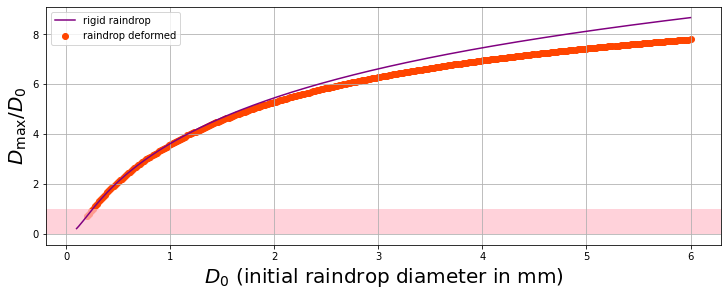

In [48]:
h_len = 10
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.scatter(d_Earth_clean*1e3,DmaxD0_Earth, c='orangered',label='raindrop deformed')
ax.plot(d_Earth*1e3,DmaxD0_Earth_rigid, c='purple',label='rigid raindrop')

ax.axhspan(0, 1, xmin=-0.5, xmax=14, facecolor='pink', alpha=0.7)

ax.set_xlabel(r'$D_0$ (initial raindrop diameter in mm)', fontsize=20)
ax.set_ylabel(r'$D_{\rm max}/D_{0}$', fontsize=20)
ax.legend()
ax.grid()

#### Case of Mars

In [49]:
Mco2 = 44e-3 # Masse molaire du CO2
T    = 273   # Température limite basse pour l'atmosphère marsienne.
Pmin = 0.5E5 # Limite basse pour la pression atmosphérique.
Pmax = 4e5   # Limite haute pour la pression atmosphérique.

Rgas = 8.31

rho_air_min_Mars = Pmin*Mco2/Rgas/T # Air density (kg m^-3)
rho_air_max_Mars = Pmax*Mco2/Rgas/T # Air density (kg m^-3)

#rho_air_min_Mars, rho_air_max_Mars

D_min_Mars   = 0.2E-3
D_max_Mars   = 1e-2


rho_liq    = 1e3
g          = g_Mars
sigma_Mars = sigma_Earth
eta_Mars   = eta_Earth

Mair    = Mco2
T       = 273
dim_molecule      = 232e-12 # Taille d'une molécule de diazote.

rigid   = 0
CdEq    = 10

visco   = 'GP'
Npt     = 300
d_Mars  = np.linspace(D_min_Mars,D_max_Mars,Npt)

In [50]:
# Case of marsian deformed raindrops for the minimum pressure:
rho_air = rho_air_min_Mars
DmaxD0_Mars_Pmin = np.array([])
d_Mars_clean_Pmin= np.array([])

for d in d_Mars:
    We, Re, DsD0 = Dmax_solid_surf(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma_Mars,eta_Mars,rigid,CdEq)
    if We > 1:
        d_Mars_clean_Pmin= np.append(d_Mars_clean_Pmin,d)
        DmaxD0_Mars_Pmin = np.append(DmaxD0_Mars_Pmin, DsD0)
    
# Case of marsian deformed raindrops for the minimum pressure:    
rho_air = rho_air_max_Mars
DmaxD0_Mars_Pmax = np.array([])
d_Mars_clean_Pmax= np.array([])
for d in d_Mars:
    We, Re, DsD0 = Dmax_solid_surf(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma_Mars,eta_Mars,rigid,CdEq)
    if We > 1:
        d_Mars_clean_Pmax= np.append(d_Mars_clean_Pmax,d)
        DmaxD0_Mars_Pmax = np.append(DmaxD0_Mars_Pmax, DsD0)

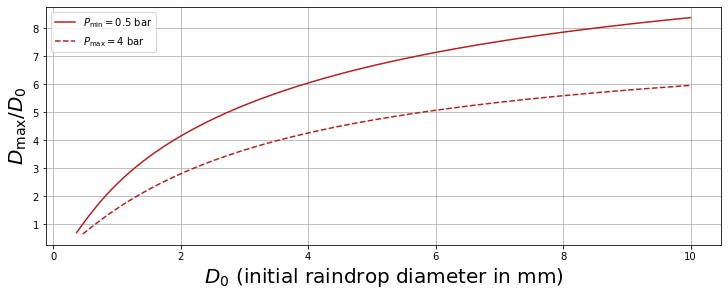

In [51]:
h_len = 10
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Mars_clean_Pmin*1e3,DmaxD0_Mars_Pmin, c='firebrick', label=r'$P_{\rm min}= 0.5$ bar')
ax.plot(d_Mars_clean_Pmax*1e3,DmaxD0_Mars_Pmax, c='firebrick', ls='--', label=r'$P_{\rm max}= 4$ bar')

ax.set_xlabel(r'$D_0$ (initial raindrop diameter in mm)', fontsize=20)
ax.set_ylabel(r'$D_{\rm max}/D_{0}$', fontsize=20)
ax.legend()
ax.grid()

#### Case of Titan

In [52]:
rho_liq = rho_liq_Titan 
g       = g_Titan
rho_air = rho_air_Titan
Mair    = 28e-3
T       = 95
dim_molecule      = 155e-12 # Taille d'une molécule de diazote.

g       = g_Titan
sigma   = sigma_Titan
eta_liq = eta_Titan

D_min_Titan   = 1e-3
D_max_Titan   = 1.3e-2
visco   = 'GP'
Npt     = 300
d_Titan       = np.linspace(D_min_Titan,D_max_Titan,Npt)

rigid = 0
CdEq  = 10

In [53]:
# Case of Titan deformed raindrops:
DmaxD0_Titan = np.array([])
d_Titan_clean= np.array([])
for d in d_Titan:
    We, Re, DsD0 = Dmax_solid_surf(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma,eta_liq,rigid,CdEq)
    if We > 1:
        d_Titan_clean= np.append(d_Titan_clean,d)
        DmaxD0_Titan = np.append(DmaxD0_Titan, DsD0)

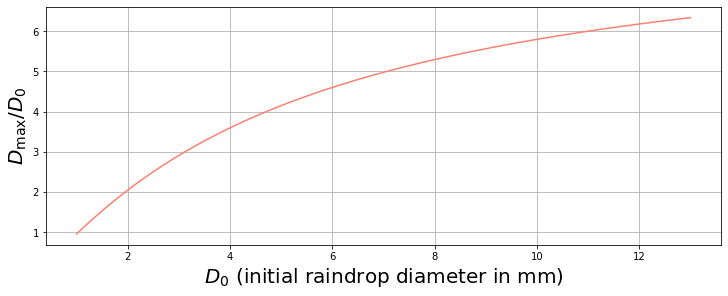

In [54]:
h_len = 10
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Titan_clean*1e3,DmaxD0_Titan, c='salmon')

ax.set_xlabel(r'$D_0$ (initial raindrop diameter in mm)', fontsize=20)
ax.set_ylabel(r'$D_{\rm max}/D_{0}$', fontsize=20)
#ax.legend()
ax.grid()

### Synthesis for 3 objects

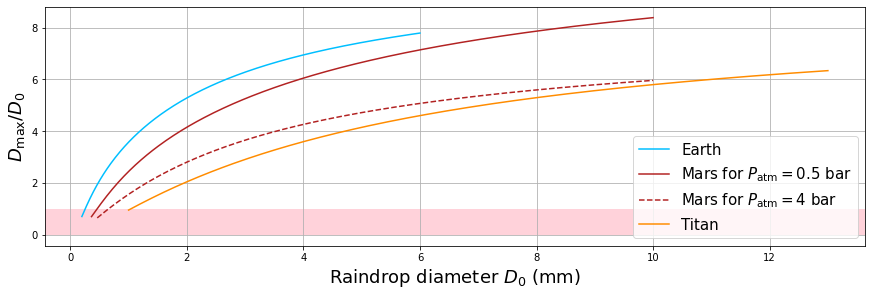

In [55]:
h_len = 12
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Earth_clean*1e3,DmaxD0_Earth, c='deepskyblue', label='Earth')

ax.plot(d_Mars_clean_Pmin*1e3,DmaxD0_Mars_Pmin, c='firebrick',        label=r'Mars for $P_{\rm atm}= 0.5$ bar')
ax.plot(d_Mars_clean_Pmax*1e3,DmaxD0_Mars_Pmax, c='firebrick',ls='--',label=r'Mars for $P_{\rm atm}= 4$ bar')

ax.plot(d_Titan_clean*1e3,DmaxD0_Titan, c='darkorange',label=r'Titan')

ax.set_xlabel('Raindrop diameter $D_0$ (mm)',fontsize=18)
ax.set_ylabel(r'$D_{\rm max}/D_0$',fontsize=18)
ax.legend(fontsize=15)
ax.grid()

ax.axhspan(0, 1, xmin=-0.5, xmax=14, facecolor='pink', alpha=0.7)
fig.savefig('DmaxDO_TitanEarthMars.pdf')

**Figure** We put in pink the zone where $D_{\rm max}/D_0$ is lower than 1, corresponding to a fully deformed raindrop.

# Comparaison avec Delon *et al*. (2011)

Delon, G., Terwagne, D., Dorbolo, S., Vandewalle, N., & Caps, H. (2011, Oct). Impact of liquid droplets on granular media. Phys. Rev. E , 84 , 046320. Retrieved from https://link.aps.org/doi/10.1103/PhysRevE.84.046320 doi:10.1103/PhysRevE.84.046320

In [56]:
def DmaxD0_Delon11(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma,eta_liq,rigid,CdEq):
    """
    D. Cordier - 27 janvier 2023.
    Inputs:
      - rho_liq ---: density of the liquid (kg/m^3).
      - rho_air ---: density of the air (kg/m^3).
      - visco -----: keyword
                        'GP' ---: the viscosity is given by the law relevant for ideal gases.
                        'LOR' --: the visocity is given by the law use by Lorenz (1993) relevant for N2.
      - Mair ------: mean molecular weigth of the air (kg/mol).
      - T ---------: temperature (K).
      - dim_molecule --: size of molecules of the air (m).
      - g ---------: gravity (m/s^2).
      - d ---------: droplet diameter (m).
      - sigma_liq -: surface tension (N m^-1).
      - eta_liq ---: dynamic viscosity of the liquid (Pa s).
      - rigid --------:  =0 : raindrop deformed compared to a sphere.
                         =1 : raindrop NOT-deformed compared to a sphere.
      - CdEq ---------: type of Cd equation used (cf. Clift p. 111)
    Outputs:
      - dmaxd0 ------: diamètre max. d'étalement de la goutte sur une surface plane et solide, suivant
          la loi de Delon et al. (2011)
    """
    V0 = 12 # First estimation of the researched raindrops terminal viscosity (m/s). 
    Remax_air, Umax = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,visco,Mair,T,dim_molecule,d,g,V0,rigid,CdEq)

    #print (Umax)
    We = We_liq(rho_liq,d,Umax,sigma_liq)
    
    dmaxd0 = 0.658 * We**(1/4)
    
    return We, dmaxd0


### Titan case

In [57]:
rho_liq = rho_liq_Titan 
g       = g_Titan
rho_air = rho_air_Titan
Mair    = 28e-3
T       = 95
dim_molecule      = 155e-12 # Taille d'une molécule de diazote.

g       = g_Titan
sigma   = sigma_Titan
eta_liq = eta_Titan

D_min_Titan   = 1e-3
D_max_Titan   = 1.3e-2
visco   = 'GP'
Npt     = 300
d_Titan_Delon11 = np.linspace(D_min_Titan,D_max_Titan,Npt)

rigid = 0
CdEq  = 10

In [58]:
# Case of Titan deformed raindrops:
DmaxD0_Titan_Delon11 = np.array([])
d_Titan_Delon11_clean= np.array([])

for d in d_Titan_Delon11:
    We, DsD0 = DmaxD0_Delon11(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma,eta_liq,rigid,CdEq)
    if We > 1:
        d_Titan_Delon11_clean= np.append(d_Titan_Delon11_clean,d)
        DmaxD0_Titan_Delon11 = np.append(DmaxD0_Titan_Delon11, DsD0)

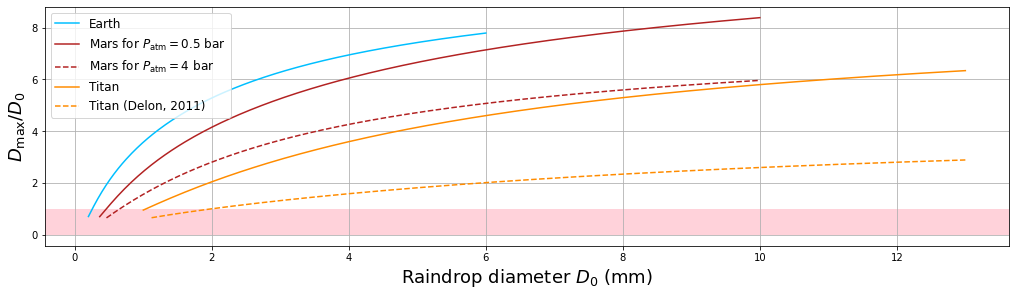

In [59]:
h_len = 14
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Earth_clean*1e3,DmaxD0_Earth, c='deepskyblue', label='Earth')

ax.plot(d_Mars_clean_Pmin*1e3,DmaxD0_Mars_Pmin, c='firebrick',        label=r'Mars for $P_{\rm atm}= 0.5$ bar')
ax.plot(d_Mars_clean_Pmax*1e3,DmaxD0_Mars_Pmax, c='firebrick',ls='--',label=r'Mars for $P_{\rm atm}= 4$ bar')

ax.plot(d_Titan_clean*1e3,DmaxD0_Titan, c='darkorange',label=r'Titan')
ax.plot(d_Titan_Delon11_clean*1e3,DmaxD0_Titan_Delon11, c='darkorange', ls='--', label=r'Titan (Delon, 2011)')

ax.set_xlabel('Raindrop diameter $D_0$ (mm)',fontsize=18)
ax.set_ylabel(r'$D_{\rm max}/D_0$',fontsize=18)
ax.legend(fontsize=12)
ax.grid()

ax.axhspan(0, 1, xmin=-0.5, xmax=14, facecolor='pink', alpha=0.7)
fig.savefig('DmaxDO_TitanEarthMars_Delon11.pdf')

# Comparaison avec Nefzaoui & Skurtys (2012)

E. Nefzaoui, O. Skurtys, "*Impact of a liquid drop on a granular medium: Inertia, viscosity and surface tension effects on the drop deformation"*, Experimental Thermal and Fluid Science, Volume 41, 2012, Pages 43-50, ISSN 0894-1777, https://doi.org/10.1016/j.expthermflusci.2012.03.007.

In [60]:
def DrimD0_Nefzaoui12(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma,eta_liq,rigid,CdEq):
    """
    D. Cordier - 27 janvier 2023.
    Inputs:
      - rho_liq ---: density of the liquid (kg/m^3).
      - rho_air ---: density of the air (kg/m^3).
      - visco -----: keyword
                        'GP' ---: the viscosity is given by the law relevant for ideal gases.
                        'LOR' --: the visocity is given by the law use by Lorenz (1993) relevant for N2.
      - Mair ------: mean molecular weigth of the air (kg/mol).
      - T ---------: temperature (K).
      - dim_molecule --: size of molecules of the air (m).
      - g ---------: gravity (m/s^2).
      - d ---------: droplet diameter (m).
      - sigma_liq -: surface tension (N m^-1).
      - eta_liq ---: dynamic viscosity of the liquid (Pa s).
      - rigid --------:  =0 : raindrop deformed compared to a sphere.
                         =1 : raindrop NOT-deformed compared to a sphere.
      - CdEq ---------: type of Cd equation used (cf. Clift p. 111)
    Outputs:
      - drimd0 ------: diamètre du cratère créé par la goutte lors de l'impact avec le substrat granulaire,
           d'après Nefzaoui & Skurtys (2012)
    """
    V0 = 12 # First estimation of the researched raindrops terminal viscosity (m/s). 
    Remax_air, Umax = l93.solve_Vlorenz(rho_liq,sigma_liq,rho_air,visco,Mair,T,dim_molecule,d,g,V0,rigid,CdEq)

    drimd0 = 0.065/d * (np.pi/12 * rho_liq * d**3 * Umax**2)**0.18
    #print (Umax,drimd0)
    return drimd0


In [61]:
# Case of Titan deformed raindrops:
d_Titan_Nefzaoui12 = d_Titan_Delon11

DmaxD0_Titan_Nefzaoui12 = np.array([])
for d in d_Titan_Nefzaoui12:
    DsD0 = DrimD0_Nefzaoui12(rho_liq,rho_air,visco,Mair,T,dim_molecule,g,d,sigma,eta_liq,rigid,CdEq)
    DmaxD0_Titan_Nefzaoui12 = np.append(DmaxD0_Titan_Nefzaoui12, DsD0)

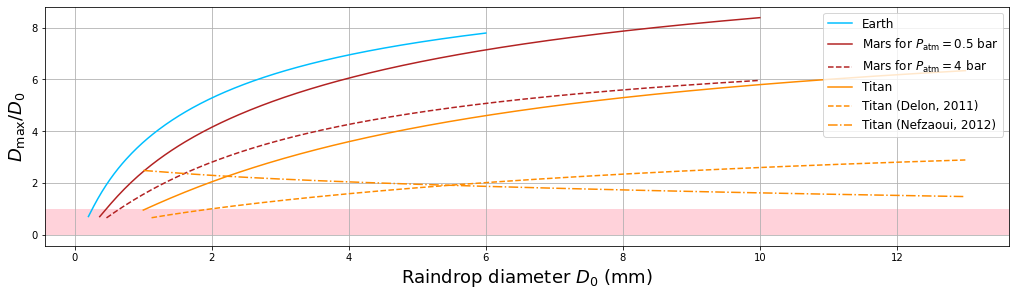

In [62]:
h_len = 14
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Earth_clean*1e3,DmaxD0_Earth, c='deepskyblue', label='Earth')

ax.plot(d_Mars_clean_Pmin*1e3,DmaxD0_Mars_Pmin, c='firebrick',        label=r'Mars for $P_{\rm atm}= 0.5$ bar')
ax.plot(d_Mars_clean_Pmax*1e3,DmaxD0_Mars_Pmax, c='firebrick',ls='--',label=r'Mars for $P_{\rm atm}= 4$ bar')

ax.plot(d_Titan_clean*1e3,DmaxD0_Titan, c='darkorange',label=r'Titan')
ax.plot(d_Titan_Delon11_clean*1e3,DmaxD0_Titan_Delon11, c='darkorange', ls='--', label=r'Titan (Delon, 2011)')
ax.plot(d_Titan_Nefzaoui12*1e3,DmaxD0_Titan_Nefzaoui12, c='darkorange', ls='-.', label=r'Titan (Nefzaoui, 2012)')

ax.set_xlabel('Raindrop diameter $D_0$ (mm)',fontsize=18)
ax.set_ylabel(r'$D_{\rm max}/D_0$',fontsize=18)
ax.legend(fontsize=12)
ax.grid()

ax.axhspan(0, 1, xmin=-0.5, xmax=14, facecolor='pink', alpha=0.7)
fig.savefig('DmaxDO_TitanEarthMars_Delon11Nef12.pdf')

# Comparison with Zhao *et al*. (2015)

Zhao, S.-C., de Jong, R., & van der Meer, D. (2015). Raindrop impact on sand: a dynamic explanation of crater morphologies. Soft Matter , 11 , 6562-6568. doi: 10.1039/C5SM00957J

In [63]:
import zhao15 as z15

In [64]:
d_Titan_Zhao15 = d_Titan_Delon11

phi0 = 0.58

DmaxD0_Titan_zhao058 = np.array([])

for d0 in d_Titan_Zhao15:
    We, Wec, dd = z15.DmaxD0_Zhao15(phi0,rho_liq,sigma_Titan,rho_air,visco,Mair,T,dim_molecule,d0,g,rigid,CdEq)
    DmaxD0_Titan_zhao058 = np.append(DmaxD0_Titan_zhao058, dd)
    

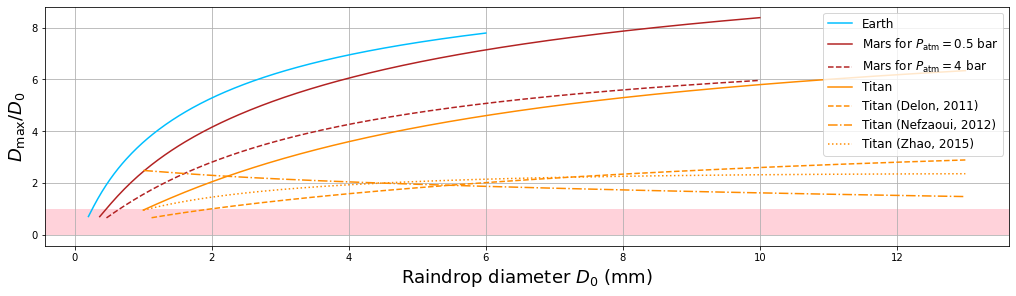

In [65]:
h_len = 14
v_len = 4
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Earth_clean*1e3,DmaxD0_Earth, c='deepskyblue', label='Earth')

ax.plot(d_Mars_clean_Pmin*1e3,DmaxD0_Mars_Pmin, c='firebrick',        label=r'Mars for $P_{\rm atm}= 0.5$ bar')
ax.plot(d_Mars_clean_Pmax*1e3,DmaxD0_Mars_Pmax, c='firebrick',ls='--',label=r'Mars for $P_{\rm atm}= 4$ bar')

ax.plot(d_Titan_clean*1e3,DmaxD0_Titan, c='darkorange',label=r'Titan')
ax.plot(d_Titan_Delon11_clean*1e3,DmaxD0_Titan_Delon11, c='darkorange', ls='--', label=r'Titan (Delon, 2011)')
ax.plot(d_Titan_Nefzaoui12*1e3,DmaxD0_Titan_Nefzaoui12, c='darkorange', ls='-.', label=r'Titan (Nefzaoui, 2012)')
ax.plot(d_Titan_Zhao15*1e3,DmaxD0_Titan_zhao058, c='darkorange', ls=':', label=r'Titan (Zhao, 2015)')


ax.set_xlabel('Raindrop diameter $D_0$ (mm)',fontsize=18)
ax.set_ylabel(r'$D_{\rm max}/D_0$',fontsize=18)
ax.legend(fontsize=12)
ax.grid()

ax.axhspan(0, 1, xmin=-0.5, xmax=14, facecolor='pink', alpha=0.7)
fig.savefig('DmaxDO_TitanEarthMars_Delon11Nef12Zhao15.pdf')

# Figure for the paper

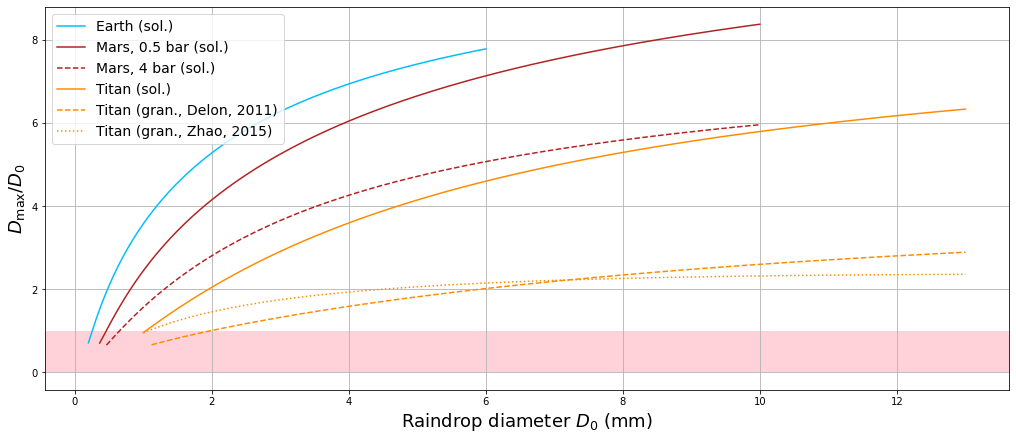

In [66]:
h_len = 14
v_len = 6
fig, ax = plt.subplots(1,1,figsize=(h_len,v_len),constrained_layout=True) # ATTENTION au S de subplotS !
                                                  # Le PREMIER INDICE ----: nbr de rangées
                                                  # le DEUXIEME INDICE ---: nbr de colonnes

ax.plot(d_Earth_clean*1e3,DmaxD0_Earth, c='deepskyblue', label='Earth (sol.)')

ax.plot(d_Mars_clean_Pmin*1e3,DmaxD0_Mars_Pmin, c='firebrick',        label=r'Mars, 0.5 bar (sol.)')
ax.plot(d_Mars_clean_Pmax*1e3,DmaxD0_Mars_Pmax, c='firebrick',ls='--',label=r'Mars, 4 bar (sol.)')

ax.plot(d_Titan_clean*1e3,DmaxD0_Titan, c='darkorange',label=r'Titan (sol.)')
ax.plot(d_Titan_Delon11_clean*1e3,DmaxD0_Titan_Delon11, c='darkorange', ls='--', label=r'Titan (gran., Delon, 2011)')
#ax.plot(d_Titan_Nefzaoui12*1e3,DmaxD0_Titan_Nefzaoui12, c='darkorange', ls='-.', label=r'Titan (Nefzaoui, 2012)')
ax.plot(d_Titan_Zhao15*1e3,DmaxD0_Titan_zhao058, c='darkorange', ls=':', label=r'Titan (gran., Zhao, 2015)')


ax.set_xlabel('Raindrop diameter $D_0$ (mm)',fontsize=18)
ax.set_ylabel(r'$D_{\rm max}/D_0$',fontsize=18)
ax.legend(fontsize=14)
ax.grid()

ax.axhspan(0, 1, xmin=-0.5, xmax=14, facecolor='pink', alpha=0.7)
fig.savefig('DmaxDO_TitanEarthMars_Synthese.pdf')